In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
mall_customer=pd.read_csv("Mall_Customers.csv")
data=mall_customer.copy()

In [3]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mall_customer.drop(["CustomerID","Gender","Age"],axis=1,inplace=True)

In [5]:
mall_customer

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

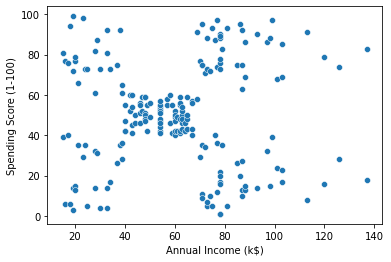

In [6]:
sns.scatterplot(mall_customer["Annual Income (k$)"],mall_customer["Spending Score (1-100)"])

In [7]:
#k is decided by elbow method

In [8]:
x=np.array(mall_customer.iloc[:,:])

In [9]:
x.shape

(200, 2)

In [10]:
wcss=[]
for i in range(1,11):
    k_mean=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    k_mean.fit(x)
    wcss.append(k_mean.inertia_)

Text(0, 0.5, 'wcss')

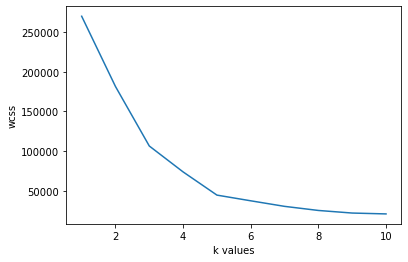

In [11]:
plt.plot(range(1,11),wcss)
plt.xlabel("k values")
plt.ylabel("wcss")


In [12]:
k_mean=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
k_mean.fit(x)
y_pred=k_mean.predict(x)

<AxesSubplot:>

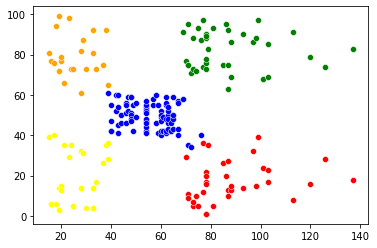

In [13]:
sns.scatterplot(x[y_pred==0,0],x[y_pred==0,1],color="red")
sns.scatterplot(x[y_pred==1,0],x[y_pred==1,1],color="blue")
sns.scatterplot(x[y_pred==2,0],x[y_pred==2,1],color="green")
sns.scatterplot(x[y_pred==3,0],x[y_pred==3,1],color="orange")
sns.scatterplot(x[y_pred==4,0],x[y_pred==4,1],color="yellow")

In [14]:
#silhoutte Scoring
from sklearn.metrics import silhouette_score

score=silhouette_score(x,k_mean.labels_,metric="euclidean")
print("silhouette score is",score)

silhouette score is 0.553931997444648


In [15]:
gender=pd.get_dummies(data["Gender"],drop_first=True)

In [16]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
gender

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [18]:
data.drop(["Gender","CustomerID"],axis=1,inplace=True)

In [19]:
data=pd.concat([gender,data],axis=1)

In [20]:
data

,Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [21]:
wcss=[]
for i in range(1,11):
    k_mean=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    k_mean.fit(x)
    wcss.append(k_mean.inertia_)

Text(0, 0.5, 'wcss')

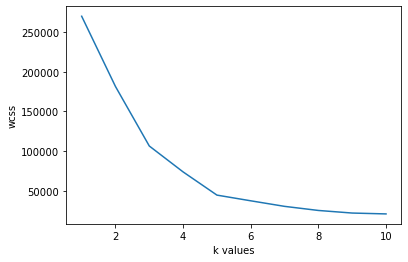

In [22]:
plt.plot(range(1,11),wcss)
plt.xlabel("k values")
plt.ylabel("wcss")

In [23]:
k_mean=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
k_mean.fit(x)
y_pred=k_mean.predict(x)

In [24]:
#silhoutte Scoring
from sklearn.metrics import silhouette_score

score=silhouette_score(x,k_mean.labels_,metric="euclidean")
print("silhouette score is",score)

silhouette score is 0.553931997444648
